# **Problem Statement**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.

Analysed customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# **Analysis Approach**



*   Telecommunications industry experiences an average of 15 - 25% annual churn
rate.Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become even more important than customer acquisition.

*  Here we are given with 4 months of data related to customer usage. In this case study, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


*   Churn is predicted using two approaches. Usage based churn and Revenue based churn. Usage based churn:Customers who have zero usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.This case study only considers usage based churn.

*   In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.

*  The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

*  The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

*  This is a classification problem, where we need to predict whether the customers is about to churn or not.





# **Steps for Analysis**



1.   Reading and understanding the data
2.   Missing Value Treatment
3.   Preparing Data for Modeling
4.   Exploratory Data Analysis on the churn data (EDA)
5.   Bulid the model
6.   Evaluate the model
7.   Baseline Logistic Regression, then Logistic Regression with PCA, PCA +
     Random Forest, PCA







# **1. Reading and Understanding the data**

In [2]:
# Importing necessary libraries.
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Dataset into a DataFrame.
telecom_data=pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#Dimension of dataframe (Rows and columns in dataframe)
telecom_data.shape

(99999, 226)

In [5]:
# Get consice summary information about the DataFrame, including column datatypes and non-null counts
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#summarized data for the whole dataframe
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


# **2. Missing Value Treatment**

In [7]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [8]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])
col_list_missing_30

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [9]:
# Delete the columns having more than 30% missing values
telecom_data = telecom_data.drop(col_list_missing_30, axis=1)

In [10]:
# dimension after deleting missig value columns
telecom_data.shape

(99999, 186)

In [11]:
###  Deleting the date columns as the date columns are not required in our analysis

# List the date columns
date_cols = [k for k in telecom_data.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [12]:
# Deleting the date column
telecom_data = telecom_data.drop(date_cols, axis=1)


In [13]:
# Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.
telecom_data = telecom_data.drop('circle_id', axis=1)

In [14]:
# Dimension after missing value treatment
telecom_data.shape

(99999, 177)

**Filter high-value customers**

In [15]:
# Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
telecom_data['avg_rech_amt_6_7'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2

#Finding the 70th percentile of the avg_rech_amt_6_7
per_70 = telecom_data['avg_rech_amt_6_7'].quantile(0.7)
per_70


368.5

In [16]:
# Filter the customers, who have recharged more than or equal to per_70
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7'] >= per_70]
telecom_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


**Handling missing values in rows**

In [17]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = telecom_data[(telecom_data.isnull().sum(axis=1)) > (len(telecom_data.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [18]:
# Deleting the rows having more than 50% missing values
telecom_data = telecom_data.drop(df_missing_rows_50.index)
telecom_data.shape

(29897, 178)

In [19]:
# Checking the missing values in columns again
df_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


## **Month wise missing value treatment**

Data contains information of 04 months - 6,7,8,9.
For the purpose of missing value treatment, each month's revenue and usage data is not related to the other months.
Hence, missing value treatment could be performed month wise.




In [20]:
# Month 6

In [21]:
# Listing the columns of MOU Jun(6)
sixth_month_columns = []
for column in telecom_data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)

sixth_month_columns

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6']

In [22]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = telecom_data[(telecom_data['loc_og_t2m_mou_6'].isnull()) & (telecom_data['loc_ic_t2f_mou_6'].isnull()) & (telecom_data['roam_og_mou_6'].isnull()) & (telecom_data['std_ic_t2m_mou_6'].isnull()) &
  (telecom_data['loc_og_t2t_mou_6'].isnull()) & (telecom_data['std_ic_t2t_mou_6'].isnull()) & (telecom_data['loc_og_t2f_mou_6'].isnull()) & (telecom_data['loc_ic_mou_6'].isnull()) &
  (telecom_data['loc_og_t2c_mou_6'].isnull()) & (telecom_data['loc_og_mou_6'].isnull()) & (telecom_data['std_og_t2t_mou_6'].isnull()) & (telecom_data['roam_ic_mou_6'].isnull()) &
  (telecom_data['loc_ic_t2m_mou_6'].isnull()) & (telecom_data['std_og_t2m_mou_6'].isnull()) & (telecom_data['loc_ic_t2t_mou_6'].isnull()) & (telecom_data['std_og_t2f_mou_6'].isnull()) &
  (telecom_data['std_og_t2c_mou_6'].isnull()) & (telecom_data['og_others_6'].isnull()) & (telecom_data['std_og_mou_6'].isnull()) & (telecom_data['spl_og_mou_6'].isnull()) &
  (telecom_data['std_ic_t2f_mou_6'].isnull()) & (telecom_data['isd_og_mou_6'].isnull()) & (telecom_data['std_ic_mou_6'].isnull()) & (telecom_data['offnet_mou_6'].isnull()) &
  (telecom_data['isd_ic_mou_6'].isnull()) & (telecom_data['ic_others_6'].isnull()) & (telecom_data['std_ic_t2o_mou_6'].isnull()) & (telecom_data['onnet_mou_6'].isnull()) &
  (telecom_data['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [23]:
# Deleting the records for which MOU for Jun(6) are null
telecom_data = telecom_data.drop(df_null_mou_6.index)

In [24]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
ic_others_9,5.15
spl_og_mou_9,5.15
loc_ic_t2f_mou_9,5.15
std_og_t2t_mou_9,5.15
loc_ic_t2m_mou_9,5.15
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


In [25]:
#Month 7

In [26]:
# Listing the columns of MOU Jul(7)

seventh_month_columns = []
for column in telecom_data.columns:
    x = re.search("7$", column)
    if x:
        seventh_month_columns.append(column)

seventh_month_columns

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'avg_rech_amt_6_7']

In [27]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = telecom_data[(telecom_data['loc_og_t2m_mou_7'].isnull()) & (telecom_data['loc_ic_t2f_mou_7'].isnull()) & (telecom_data['roam_og_mou_7'].isnull()) & (telecom_data['std_ic_t2m_mou_7'].isnull()) &
  (telecom_data['loc_og_t2t_mou_7'].isnull()) & (telecom_data['std_ic_t2t_mou_7'].isnull()) & (telecom_data['loc_og_t2f_mou_7'].isnull()) & (telecom_data['loc_ic_mou_7'].isnull()) &
  (telecom_data['loc_og_t2c_mou_7'].isnull()) & (telecom_data['loc_og_mou_7'].isnull()) & (telecom_data['std_og_t2t_mou_7'].isnull()) & (telecom_data['roam_ic_mou_7'].isnull()) &
  (telecom_data['loc_ic_t2m_mou_7'].isnull()) & (telecom_data['std_og_t2m_mou_7'].isnull()) & (telecom_data['loc_ic_t2t_mou_7'].isnull()) & (telecom_data['std_og_t2f_mou_7'].isnull()) &
  (telecom_data['std_og_t2c_mou_7'].isnull()) & (telecom_data['og_others_7'].isnull()) & (telecom_data['std_og_mou_7'].isnull()) & (telecom_data['spl_og_mou_7'].isnull()) &
  (telecom_data['std_ic_t2f_mou_7'].isnull()) & (telecom_data['isd_og_mou_7'].isnull()) & (telecom_data['std_ic_mou_7'].isnull()) & (telecom_data['offnet_mou_7'].isnull()) &
  (telecom_data['isd_ic_mou_7'].isnull()) & (telecom_data['ic_others_7'].isnull()) & (telecom_data['std_ic_t2o_mou_7'].isnull()) & (telecom_data['onnet_mou_7'].isnull()) &
  (telecom_data['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
490,7000369789,0.0,0.0,0.0,679.329,0.0,0.0,0.0,189.51,NaN,...,0,0,0,0,341,0.0,0.0,0.00,0.0,393.0
539,7000670087,0.0,0.0,0.0,704.033,0.0,0.0,0.0,199.04,NaN,...,4,0,0,0,714,0.0,0.0,644.38,0.0,416.5
1555,7002024450,0.0,0.0,0.0,1138.800,0.0,0.0,0.0,75.79,NaN,...,0,0,0,0,1116,0.0,0.0,1026.06,0.0,493.0
1802,7000516213,0.0,0.0,0.0,810.455,0.0,0.0,0.0,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.00,0.0,477.5
2218,7001005804,0.0,0.0,0.0,1057.790,0.0,0.0,0.0,221.89,NaN,...,0,0,0,0,2690,0.0,0.0,0.00,0.0,525.0


In [28]:
# Deleting the records for which MOU for Jul(7) are null
telecom_data = telecom_data.drop(df_null_mou_7.index)

In [29]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_ic_mou_9,4.79
loc_ic_t2m_mou_9,4.79
loc_og_t2t_mou_9,4.79
loc_ic_mou_9,4.79
loc_og_t2m_mou_9,4.79
...,...
isd_og_mou_7,0.00
isd_og_mou_6,0.00
std_og_mou_7,0.00
std_og_mou_6,0.00


In [30]:
#Month 8

In [31]:
# Listing the columns of MOU Aug(8)
eightth_month_columns = []
for column in telecom_data.columns:
    x = re.search("8$", column)
    if x:
        eightth_month_columns.append(column)

eightth_month_columns

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8']

In [32]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = telecom_data[(telecom_data['loc_og_t2m_mou_8'].isnull()) & (telecom_data['loc_ic_t2f_mou_8'].isnull()) & (telecom_data['roam_og_mou_8'].isnull()) & (telecom_data['std_ic_t2m_mou_8'].isnull()) &
  (telecom_data['loc_og_t2t_mou_8'].isnull()) & (telecom_data['std_ic_t2t_mou_8'].isnull()) & (telecom_data['loc_og_t2f_mou_8'].isnull()) & (telecom_data['loc_ic_mou_8'].isnull()) &
  (telecom_data['loc_og_t2c_mou_8'].isnull()) & (telecom_data['loc_og_mou_8'].isnull()) & (telecom_data['std_og_t2t_mou_8'].isnull()) & (telecom_data['roam_ic_mou_8'].isnull()) &
  (telecom_data['loc_ic_t2m_mou_8'].isnull()) & (telecom_data['std_og_t2m_mou_8'].isnull()) & (telecom_data['loc_ic_t2t_mou_8'].isnull()) & (telecom_data['std_og_t2f_mou_8'].isnull()) &
  (telecom_data['std_og_t2c_mou_8'].isnull()) & (telecom_data['og_others_8'].isnull()) & (telecom_data['std_og_mou_8'].isnull()) & (telecom_data['spl_og_mou_8'].isnull()) &
  (telecom_data['std_ic_t2f_mou_8'].isnull()) & (telecom_data['isd_og_mou_8'].isnull()) & (telecom_data['std_ic_mou_8'].isnull()) & (telecom_data['offnet_mou_8'].isnull()) &
  (telecom_data['isd_ic_mou_8'].isnull()) & (telecom_data['ic_others_8'].isnull()) & (telecom_data['std_ic_t2o_mou_8'].isnull()) & (telecom_data['onnet_mou_8'].isnull()) &
  (telecom_data['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.00,0.000,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.00,0.000,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.00,0.000,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0
358,7002255278,0.0,0.0,0.0,688.670,205.780,707.91,-5.000,68.34,38.93,...,0,0,0,0,2597,1.22,17.89,383.36,0.0,750.0
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.00,378.881,249.43,39.64,...,0,0,0,0,1102,0.00,0.00,0.00,0.0,415.0


In [33]:
# Deleting the records for which MOU for Aug(8) are null
telecom_data = telecom_data.drop(df_null_mou_8.index)

In [34]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_ic_t2t_mou_9,3.01
loc_og_t2c_mou_9,3.01
std_ic_mou_9,3.01
loc_og_t2t_mou_9,3.01
og_others_9,3.01
...,...
isd_og_mou_8,0.00
spl_og_mou_6,0.00
spl_og_mou_7,0.00
spl_og_mou_8,0.00


In [35]:
#Month 9

In [36]:
# Listing the columns of MOU Aug(8)
nineth_month_columns = []
for column in telecom_data.columns:
    x = re.search("9$", column)
    if x:
        nineth_month_columns.append(column)

nineth_month_columns

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [37]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = telecom_data[(telecom_data['loc_og_t2m_mou_9'].isnull()) & (telecom_data['loc_ic_t2f_mou_9'].isnull()) & (telecom_data['roam_og_mou_9'].isnull()) & (telecom_data['std_ic_t2m_mou_9'].isnull()) &
  (telecom_data['loc_og_t2t_mou_9'].isnull()) & (telecom_data['std_ic_t2t_mou_9'].isnull()) & (telecom_data['loc_og_t2f_mou_9'].isnull()) & (telecom_data['loc_ic_mou_9'].isnull()) &
  (telecom_data['loc_og_t2c_mou_9'].isnull()) & (telecom_data['loc_og_mou_9'].isnull()) & (telecom_data['std_og_t2t_mou_9'].isnull()) & (telecom_data['roam_ic_mou_9'].isnull()) &
  (telecom_data['loc_ic_t2m_mou_9'].isnull()) & (telecom_data['std_og_t2m_mou_9'].isnull()) & (telecom_data['loc_ic_t2t_mou_9'].isnull()) & (telecom_data['std_og_t2f_mou_9'].isnull()) &
  (telecom_data['std_og_t2c_mou_9'].isnull()) & (telecom_data['og_others_9'].isnull()) & (telecom_data['std_og_mou_9'].isnull()) & (telecom_data['spl_og_mou_9'].isnull()) &
  (telecom_data['std_ic_t2f_mou_9'].isnull()) & (telecom_data['isd_og_mou_9'].isnull()) & (telecom_data['std_ic_mou_9'].isnull()) & (telecom_data['offnet_mou_9'].isnull()) &
  (telecom_data['isd_ic_mou_9'].isnull()) & (telecom_data['ic_others_9'].isnull()) & (telecom_data['std_ic_t2o_mou_9'].isnull()) & (telecom_data['onnet_mou_9'].isnull()) &
  (telecom_data['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.000,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
320,7000959346,0.0,0.0,0.0,1415.186,1754.735,229.575,-1.000,120.19,236.14,...,0,0,0,0,896,0.00,0.00,0.00,0.0,1828.5
435,7000884629,0.0,0.0,0.0,438.017,624.072,351.184,735.324,0.00,0.00,...,0,0,0,0,749,615.50,552.17,78.26,0.0,479.5
478,7000104470,0.0,0.0,0.0,637.800,480.074,0.000,0.000,1241.99,1026.66,...,0,0,0,0,356,0.00,0.00,0.00,0.0,646.0


In [38]:
# Deleting the records for which MOU for Sep(9) are null
telecom_data = telecom_data.drop(df_null_mou_9.index)

In [39]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


**There are no more missing values in any columns.**

In [40]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(telecom_data.index)/30011)),2)

0.07

 We have lost almost 7% records. But we have enough number of records to do our analysis.

# **Tagging Churn**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [41]:
telecom_data['churn'] = np.where((telecom_data['total_ic_mou_9']==0) & (telecom_data['total_og_mou_9']==0) & (telecom_data['vol_2g_mb_9']==0) & (telecom_data['vol_3g_mb_9']==0), 1, 0)

In [42]:
telecom_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


**Deleting all the attributes corresponding to the churn phase**

In [43]:
# List the columns for churn month(9)
col_9 = [col for col in telecom_data.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [44]:
# Deleting the churn month columns
telecom_data = telecom_data.drop(col_9, axis=1)

In [45]:
# Dropping sep_vbc_3g column
telecom_data = telecom_data.drop('sep_vbc_3g', axis=1)

**Checking churn percentage**

In [46]:
round(100*(telecom_data['churn'].mean()),2)

3.39

There is very little percentage of churn rate. We will take care of the class imbalance later

# **Outliers treatment**

In [47]:
telecom_data['mobile_number'] = telecom_data['mobile_number'].astype(object)
telecom_data['churn'] = telecom_data['churn'].astype(object)

In [48]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [49]:
# List only the numeric columns
numeric_cols = telecom_data.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [50]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols:
    q1 = telecom_data[col].quantile(0.10)
    q3 = telecom_data[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = telecom_data.loc[(telecom_data[col] > range_low) & (telecom_data[col] < range_high)]

data.shape

(27705, 136)

# **Deriving new features**

In [51]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

**Deriving new column decrease_mou_action**

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [52]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)
data.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


**Deriving new column decrease_rech_num_action**

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [53]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


**Deriving new column decrease_rech_amt_action**

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [54]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0)

data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


**Deriving new column decrease_arpu_action**

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [55]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


**Deriving new column decrease_vbc_action**

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [56]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


# **EDA**

# Univariate analysis

Churn rate on the basis whether the customer decreased her/his MOU in action month

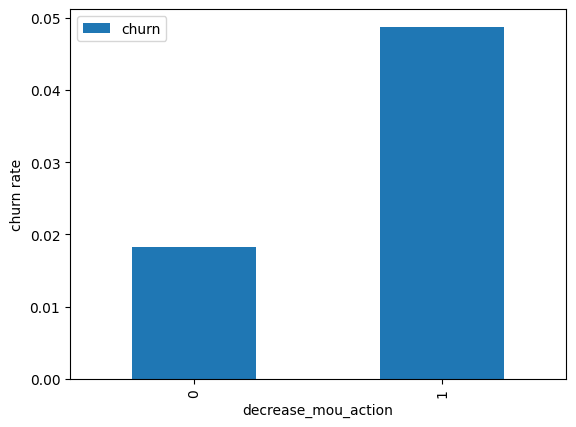

In [57]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

**Churn rate on the basis whether the customer decreased her/his number of recharge in action month**

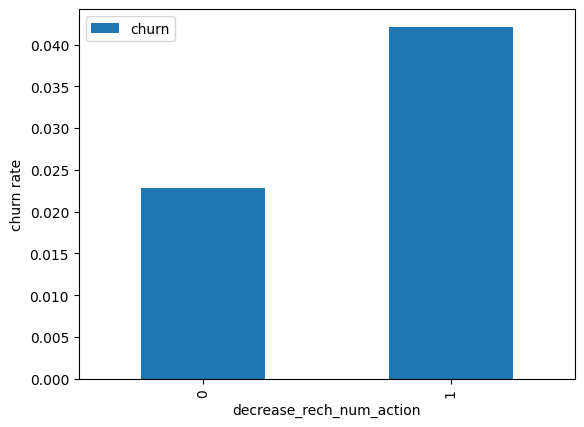

In [58]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

**Churn rate on the basis whether the customer decreased her/his amount of recharge in action month**

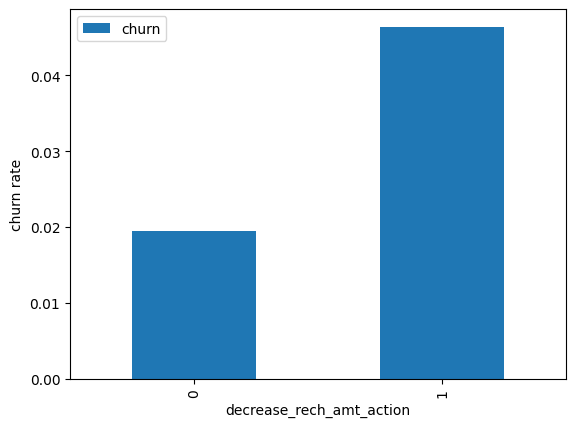

In [59]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

**Churn rate on the basis whether the customer decreased her/his volume based cost in action month**

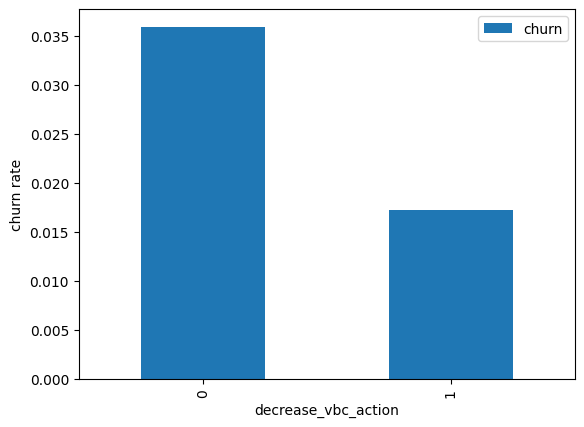

In [60]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

**Analysis of the average revenue per customer (churn and not churn) in the action phase**

[Text(0.5, 0, 'Action phase ARPU')]

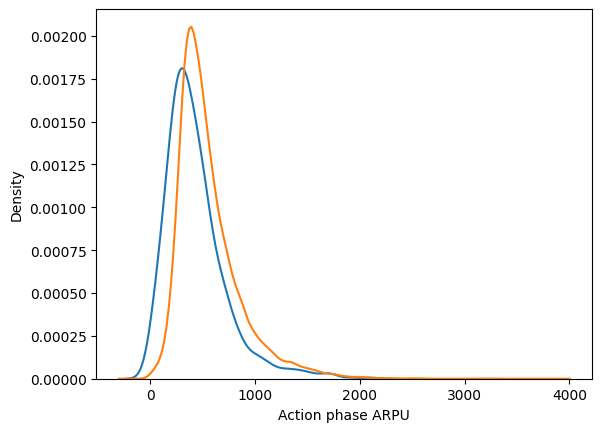

In [61]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

**Analysis**

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.


**Analysis of the minutes of usage MOU (churn and not churn) in the action phase**

[Text(0.5, 0, 'Action phase MOU')]

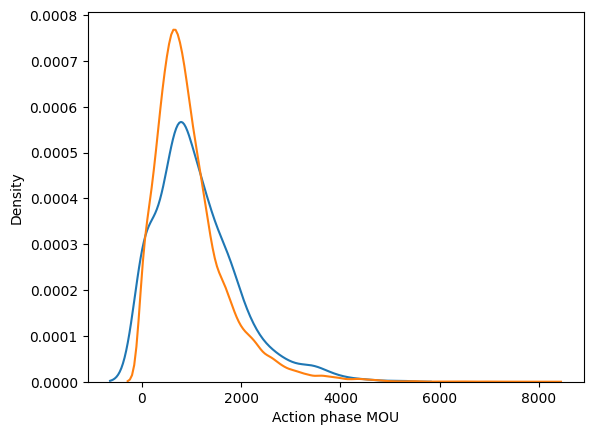

In [62]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

**Analysis**

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

# **Bivariate analysis**

**Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase**

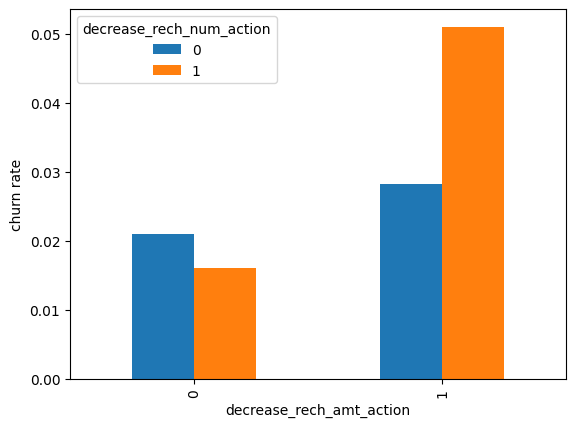

In [63]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

**Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase**

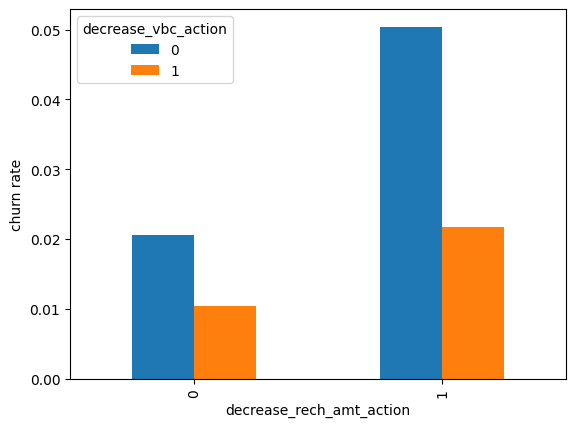

In [64]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

**Analysis of recharge amount and number of recharge in action month**

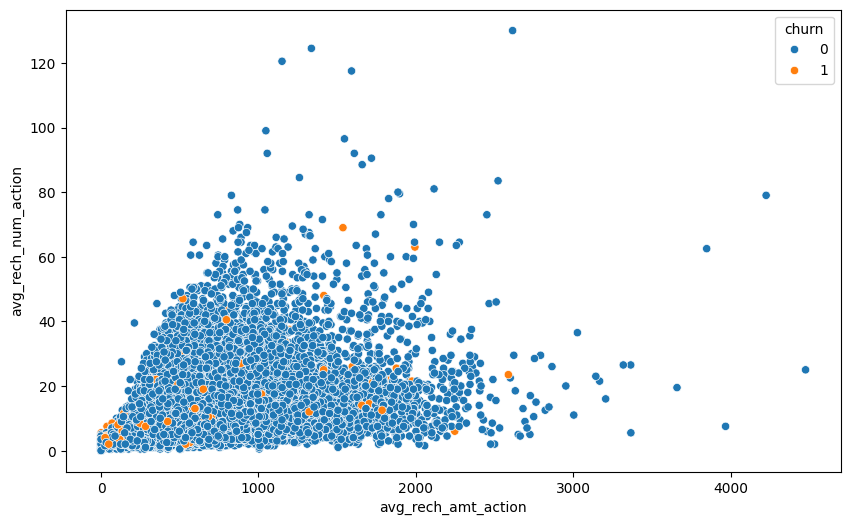

In [65]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x='avg_rech_amt_action',y='avg_rech_num_action', hue='churn', data=data)


**Analysis**

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

# **Train-Test Split**

In [66]:
# Import library
from sklearn.model_selection import train_test_split
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)
# Putting target variable to y
y = data['churn']
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Dealing with data imbalance
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [67]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

Feature Scaling

In [68]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [69]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
0,0.0,0.0,0.0,0.138907,-0.522808,-0.277722,0.105189,-0.663135,-0.467440,-0.215427,...,1,-0.536326,-0.480862,1,-0.439861,-0.512960,1,-0.270191,-0.494797,1
1,0.0,0.0,0.0,-1.416957,4.429931,3.253110,-0.658289,-0.236825,-0.004534,-0.777422,...,0,4.248331,4.710015,0,4.268466,5.041515,0,-0.280536,-0.016461,0
2,0.0,0.0,0.0,-0.221803,0.543599,0.807767,-0.601153,-0.600136,-0.332245,-0.366845,...,0,0.861052,0.810625,0,0.769588,0.877885,0,3.225389,1.866932,0
3,0.0,0.0,0.0,-0.904888,0.842781,0.729946,-0.701941,-0.651499,-0.460101,-0.791062,...,0,0.861052,1.541835,0,0.878873,1.604055,0,-0.280536,-0.016461,0
4,0.0,0.0,0.0,0.268473,0.247964,1.255106,-0.356803,-0.180521,0.115050,0.889324,...,0,0.838097,1.017168,0,0.884459,0.525764,0,-0.280536,-0.016461,0


**Scaling the Test set**
We don't fit scaler on the test set. We only transform the test set.

In [70]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
5704,0.0,0.0,0.0,0.241637,-0.268750,1.004555,-0.724948,-0.691327,-0.478334,0.475777,...,0,0.367522,0.228981,1,0.464124,0.182886,1,0.117564,0.493067,0
64892,0.0,0.0,0.0,0.047205,-0.779723,-0.159393,-0.733710,-0.699192,-0.504006,-0.362029,...,1,-0.404336,-0.385900,1,-0.502722,-0.483288,1,2.576604,-4.492374,1
39613,0.0,0.0,0.0,0.540462,0.184644,1.402045,-0.537154,-0.522396,-0.207667,0.686062,...,1,0.482296,0.031934,1,0.939821,0.323103,0,-0.280536,-0.016461,0
93118,0.0,0.0,0.0,0.635756,0.817130,-0.212452,-0.059858,0.030174,-0.156474,-0.152742,...,0,0.031807,-0.958048,1,0.298535,-0.325775,1,-0.280536,-0.016461,0
81235,0.0,0.0,0.0,3.847778,0.912154,2.744096,4.108332,1.455450,2.819122,-0.007921,...,1,2.315817,-1.375882,1,2.126796,-1.691817,1,-0.280536,-0.016461,0


# **Correlation Analysis**

In [73]:
# function to correlate variables
def correlation(dataframe) :

    columnsForAnalysis = list(set(dataframe.columns.values) - {'Churn'})  # Convert the set to a list
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)

    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [75]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported
pd.set_option('display.precision', 2)
cor_0 = correlation(data_non_churn)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide(axis="index")

VAR1,VAR2,CORR
avg_arpu_action,avg_rech_amt_action,0.970000
avg_rech_num_action,total_rech_num_7,0.940000
avg_rech_num_action,total_rech_num_8,0.940000
arpu_8,total_rech_amt_8,0.930000
aug_vbc_3g,avg_vbc_3g_action,0.930000
jul_vbc_3g,avg_vbc_3g_action,0.930000
arpu_8,avg_arpu_action,0.920000
loc_ic_mou_6,total_ic_mou_6,0.900000
arpu_8,avg_rech_amt_action,0.900000
arpu_6,total_rech_amt_6,0.900000


# **PCA**

In [81]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set.
pca.components_

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         6.37303227e-02,  1.82333857e-02,  8.69963600e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -9.57681524e-02, -1.14816846e-02, -1.75883889e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.36582873e-02,  3.46610913e-02,  3.23563785e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.44430698e-03, -9.62250006e-03, -1.16722305e-11],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         4.11811070e-02,  2.48331585e-02,  1.25554948e-14],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.90107586e-03,  5.42637799e-03, -8.80467574e-13]])

In [82]:
pca.explained_variance_ratio_

array([1.19940498e-01, 8.59668748e-02, 6.21849386e-02, 4.94365652e-02,
       4.01694374e-02, 3.75655826e-02, 3.43557484e-02, 2.88377815e-02,
       2.35627541e-02, 2.32156503e-02, 2.09093164e-02, 2.02873286e-02,
       1.88932058e-02, 1.81325231e-02, 1.67635281e-02, 1.63809457e-02,
       1.60836387e-02, 1.52474523e-02, 1.33423609e-02, 1.29294955e-02,
       1.27796585e-02, 1.25471267e-02, 1.19336495e-02, 1.09191836e-02,
       1.08250463e-02, 9.83166564e-03, 9.56955136e-03, 9.16906427e-03,
       9.02640751e-03, 8.86169844e-03, 7.97073217e-03, 7.89032931e-03,
       7.45817645e-03, 7.06675134e-03, 6.97574748e-03, 6.63950654e-03,
       6.46626842e-03, 6.13655411e-03, 5.98413107e-03, 5.87594777e-03,
       5.76957734e-03, 5.58453022e-03, 5.27476579e-03, 5.05210011e-03,
       4.83076532e-03, 4.76749873e-03, 4.64173395e-03, 4.36308980e-03,
       4.06911344e-03, 3.95724964e-03, 3.80514890e-03, 3.65723458e-03,
       3.59789934e-03, 3.44248352e-03, 3.41652023e-03, 3.35605815e-03,
      

**Scree Plot**

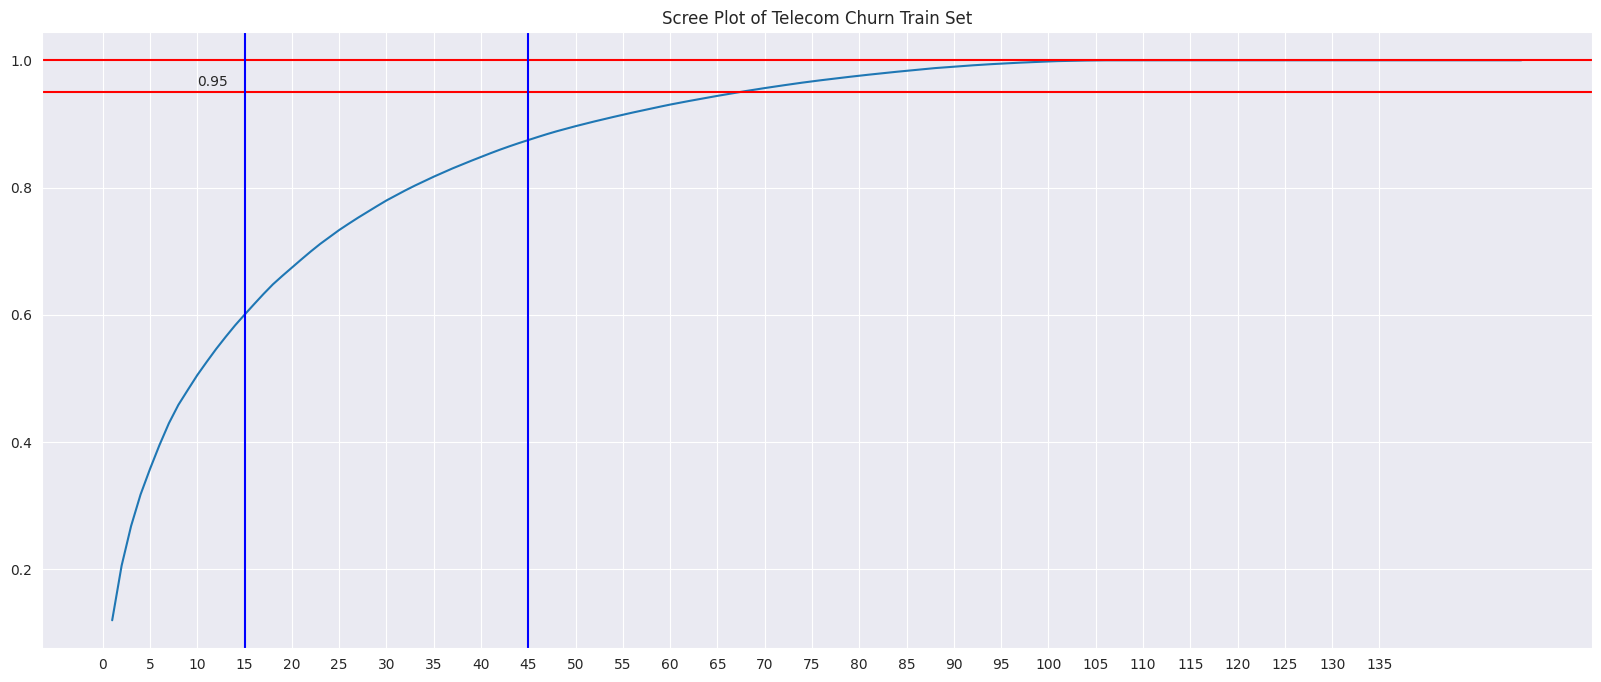

In [83]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1,len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

**From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 16 principal components and 100% of variance is explained by the first 45 principal components.**

In [84]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,churn
0,-1.77,-1.12,0.25,0.88,-0.07,2.71,-1.31,0.89,-0.66,-2.49,...,0.55,0.90,0.23,0.09,-1.52,0.36,0.01,-0.54,-0.11,0
1,8.51,5.07,10.09,-4.25,-0.70,-0.73,-2.91,0.64,0.67,1.48,...,-1.81,-0.24,0.44,0.66,-1.67,0.07,0.22,0.24,0.13,0
2,2.55,-4.12,3.04,3.14,-1.74,2.47,-0.37,-0.38,0.22,-0.59,...,-1.21,-0.41,0.29,-0.07,1.33,0.11,-0.08,0.21,-0.20,0
3,1.42,-3.75,5.41,4.50,-1.29,3.44,0.32,-1.54,1.16,2.05,...,2.84,0.86,0.56,0.25,-2.88,0.44,-0.18,-1.11,1.02,0
4,6.50,-1.05,-0.34,-2.95,2.23,-0.89,-1.58,-1.01,-2.46,0.24,...,-0.31,-1.17,-2.16,1.13,-0.39,-2.32,0.32,0.27,0.72,0


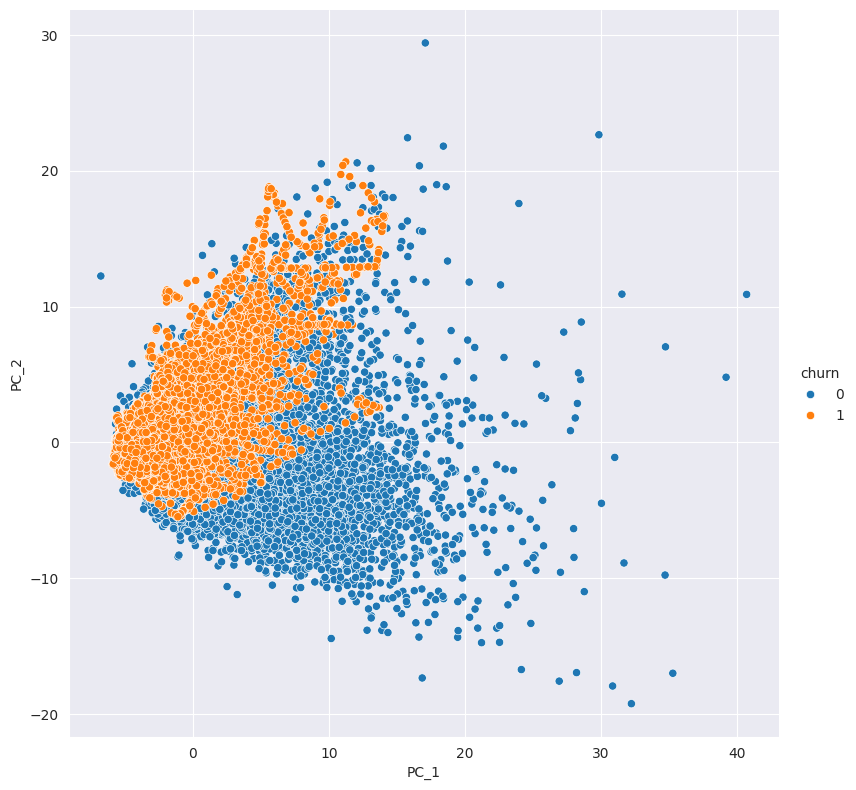

In [85]:
## Plotting principal components
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue="churn", size=8);


**Model  : PCA + Logistic Regression Model**

In [86]:
from sklearn.linear_model import LogisticRegression

# X,y Split
y_train_pca = data_train_pca.pop('churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca )

LogisticRegression(class_weight='balanced', random_state=100)

In [87]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]


array([0, 0, 0, 0, 0])

In [88]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([0, 0, 0, 0, 0])

**Baseline Performance**

In [91]:
baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [89]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [92]:
# Prediction at threshold of 0.5
classification_threshold = 0.5

y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [93]:
#Baseline Performance
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.862
Sensitivity / True Positive Rate / Recall : 0.892
Specificity / True Negative Rate :  0.832
Precision / Positive Predictive Value : 0.842
F1-score : 0.866

Test Performance :

Accuracy : 0.828
Sensitivity / True Positive Rate / Recall : 0.803
Specificity / True Negative Rate :  0.829
Precision / Positive Predictive Value : 0.145
F1-score : 0.246


# **Without PCA**

**Logistic regression with No PCA**

In [101]:
##### Importing stats model
import statsmodels.api as sm
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
# Fit the model
log_no_pca = log_no_pca.fit().summary()
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42715
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Feb 2025   Deviance:                       69722.
Time:                        06:24:20   Pearson chi2:                 3.41e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     6.384e+14   8.37e+05   7.63e+08      0.000    6.38e+14    6.38e+14
loc_og_t2o_mou            1.464e+07      0.470   3.12e+07      0.000    1.46e+07    1.46e+07
std_og_t2o_mou            1.389e+07      0.697   1.99e+07      0.000    1.39e+07    1.39e+07
loc_ic_t2o_mou           -1.629e+07      1.135  -1.44e+07      0.000   -1.63e+07   -1.63e+07
arpu_6                    7.969e+11   7.95e+05      1e+06      0.000    7.97e+11    7.97e+11
arpu_7                   -8.296e+12   1.06e+06  -7.84e+06      0.000    -8.3e+12    -8.3e+12
arpu_8                    2.944e+13   1.13e+06    2.6e+07      0.000    2.94e+13    2.94e+13
onnet_mou_6               5.133e+13   5.28e+07   9.72e+05      0.000    5.13e+13    5.13e+13
onnet_mou_7               9.605e+13   3.46e+07   2.77e+06      0.000    9.61e+13    9.61e+13
onnet_mou_8              -9.376e+14   2.06e+07  -4.55e+07      0.000   -9.38e+14   -9.38e+14
offnet_mou_6              1.805e+14   4.97e+07   3.63e+06      0.000    1.81e+14    1.81e+14
offnet_mou_7             -1.441e+13    3.3e+07  -4.36e+05      0.000   -1.44e+13   -1.44e+13
offnet_mou_8             -8.761e+14   2.11e+07  -4.16e+07      0.000   -8.76e+14   -8.76e+14
roam_ic_mou_6             2.382e+13   5.91e+05   4.03e+07      0.000    2.38e+13    2.38e+13
roam_ic_mou_7             -3.14e+12   6.77e+05  -4.63e+06      0.000   -3.14e+12   -3.14e+12
roam_ic_mou_8             7.304e+11    5.9e+05   1.24e+06      0.000     7.3e+11     7.3e+11
roam_og_mou_6              -4.6e+13   1.66e+07  -2.77e+06      0.000    -4.6e+13    -4.6e+13
roam_og_mou_7             2.233e+13   8.91e+06   2.51e+06      0.000    2.23e+13    2.23e+13
roam_og_mou_8             1.932e+14   5.97e+06   3.24e+07      0.000    1.93e+14    1.93e+14
loc_og_t2t_mou_6         -2.937e+17    1.2e+10  -2.44e+07      0.000   -2.94e+17   -2.94e+17
loc_og_t2t_mou_7         -3.327e+17   1.26e+10  -2.65e+07      0.000   -3.33e+17   -3.33e+17
loc_og_t2t_mou_8         -7.518e+17   1.19e+10  -6.29e+07      0.000   -7.52e+17   -7.52e+17
loc_og_t2m_mou_6         -2.981e+17   1.22e+10  -2.45e+07      0.000   -2.98e+17   -2.98e+17
loc_og_t2m_mou_7          -3.15e+17   1.19e+10  -2.65e+07      0.000   -3.15e+17   -3.15e+17
loc_og_t2m_mou_8         -8.028e+17   1.28e+10  -6.29e+07      0.000   -8.03e+17   -8.03e+17
loc_og_t2f_mou_6         -2.534e+16   1.04e+09  -2.45e+07      0.000   -2.53e+16   -2.53e+16
loc_og_t2f_mou_7         -2.776e+16   1.05e+09  -2.65e+07      0.000   -2.78e+16   -2.78e+16
loc_og_t2f_mou_8         -6.654e+16   1.05e+09  -6.31e+07      0.000   -6.65e+16   -6.65e+16
loc_og_t2c_mou_6          3.155e+12   4.57e+05    6.9e+06      0.000    3.16e+12    3.16e+12
loc_og_t2c_mou_7          1.137e+13   4.59e+05   2.48e+07      0.000    1.14e+13    1.14e+13
loc_og_t2c_mou

**Model analysis**

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.

**Coarse tuning (Auto+Manual)**

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

# **Business recomendation**
**Top predictors**
Below are few top variables selected in the logistic regression model.

Variables	Coefficients
| Variables            | Coefficients |

|----------------------|--------------|

| loc_ic_mou_8        | -3.3287       |

| og_others_7         | -2.4711       |

| ic_others_8         | -1.5131       |

| isd_og_mou_8        | -1.3811       |

| decrease_vbc_action | -1.3293       |

| monthly_3g_8        | -1.0943       |

| std_ic_t2f_mou_8    | -0.9503       |

| monthly_2g_8        | -0.9279       |

| loc_ic_t2f_mou_8    | -0.7102       |

| roam_og_mou_8       | 0.7135        |

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

**Recomendations**

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.

# Plots of important predictors for churn and non churn customers

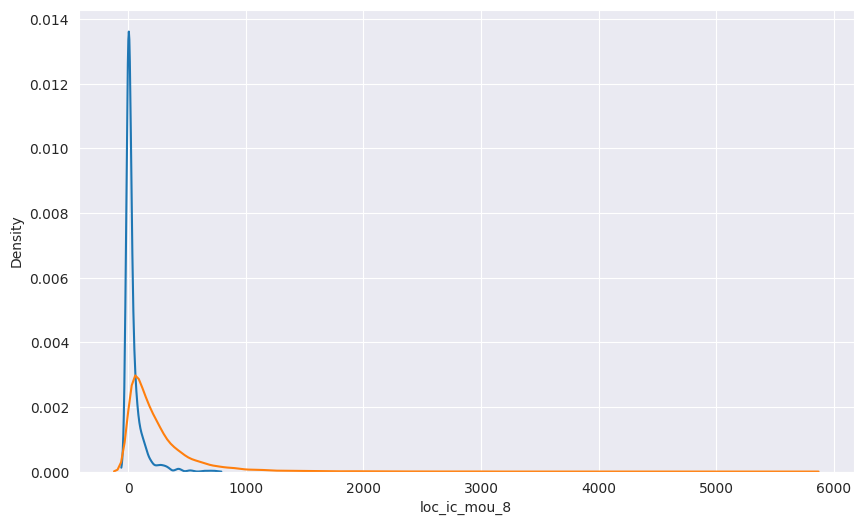

In [106]:

# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

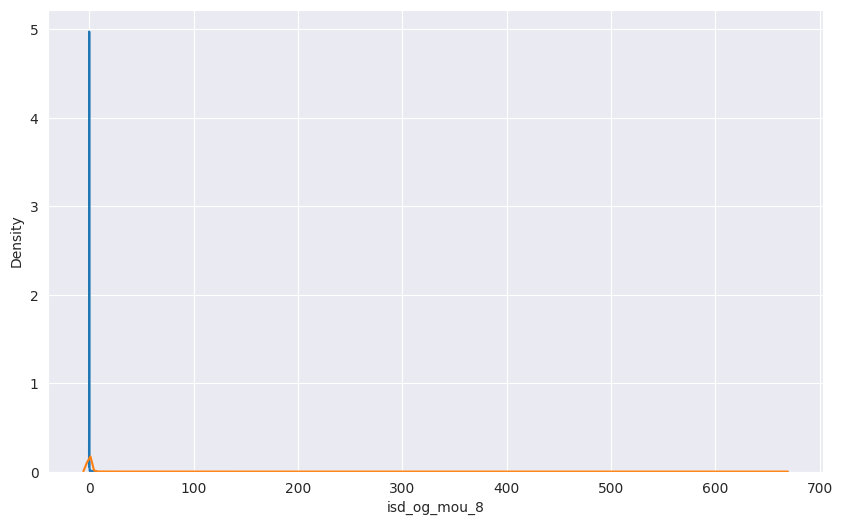

In [107]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

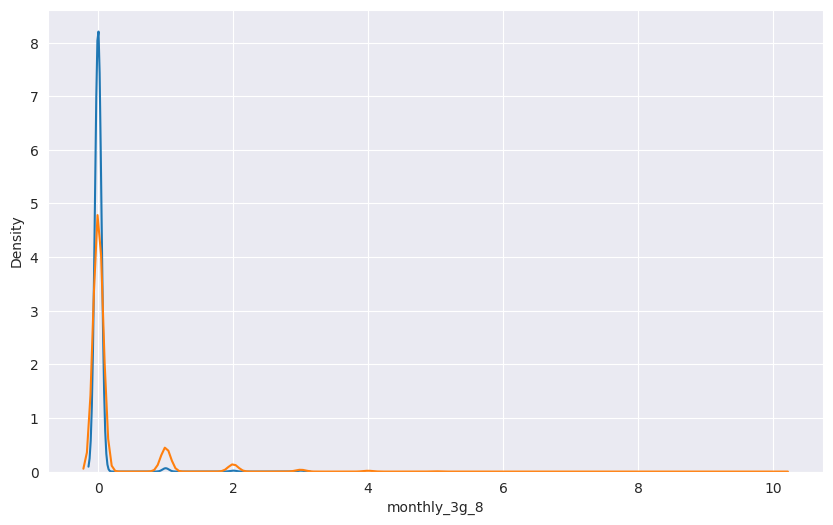

In [108]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.